In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from datetime import datetime
import numpy as np
import os 

path = os.path.abspath("C:/Users/steve/Google Drive/Master/Masterarbet/Evaluation/graphics/disruption")
print(path)


font = {'size': 13}
plt.rc('font', **font)


# Read in the data from the CSV file
telnetToLocalVM2Both = pd.read_csv('telnetToLocalVM2MTDBoth.txt')
telnetToLocalVM2Both = telnetToLocalVM2Both.iloc[-3000:]
print(telnetToLocalVM2Both)


telnetToLocalVM2OnlyIP = pd.read_csv('telnetToLocalVM2MTDOnlyIP.txt')
telnetToLocalVM2OnlyIP = telnetToLocalVM2OnlyIP.iloc[-3000:]
telnetToLocalVM2BothActive = pd.read_csv('telnetToLocalVM2MTDBothActive.txt')
telnetToLocalVM2BothActive = telnetToLocalVM2BothActive.iloc[-3000:]


print(telnetToLocalVM2Both)
print(telnetToLocalVM2OnlyIP)
print(telnetToLocalVM2BothActive)

C:\Users\steve\Google Drive\Master\Masterarbet\Evaluation\graphics\disruption
          time  telnetToLocalPossible
4564  17:35:03                   True
4565  17:35:03                   True
4566  17:35:04                   True
4567  17:35:04                   True
4568  17:35:05                   True
...        ...                    ...
7559  18:00:41                   True
7560  18:00:42                   True
7561  18:00:42                   True
7562  18:00:43                   True
7563  18:00:43                   True

[3000 rows x 2 columns]
          time  telnetToLocalPossible
4564  17:35:03                   True
4565  17:35:03                   True
4566  17:35:04                   True
4567  17:35:04                   True
4568  17:35:05                   True
...        ...                    ...
7559  18:00:41                   True
7560  18:00:42                   True
7561  18:00:42                   True
7562  18:00:43                   True
7563  18:00:43         

In [2]:
for index, row in telnetToLocalVM2Both.iterrows():
    if row["telnetToLocalPossible"] == False:
        print(f"there is at least one unable in VM2OBoth")
        break
        
for index, row in telnetToLocalVM2OnlyIP.iterrows():
    if row["telnetToLocalPossible"] == False:
        print(f"there is at least one unable in VM2OnlyIP")
        break
        
for index, row in telnetToLocalVM2OnlyIP.iterrows():
    if row["telnetToLocalPossible"] == False:
        print(f"there is at least one unable in VM2OnlyIP")
        break
        
        

there is at least one unable in VM2OBoth
there is at least one unable in VM2OnlyIP
there is at least one unable in VM2OnlyIP


0.31633333333333336


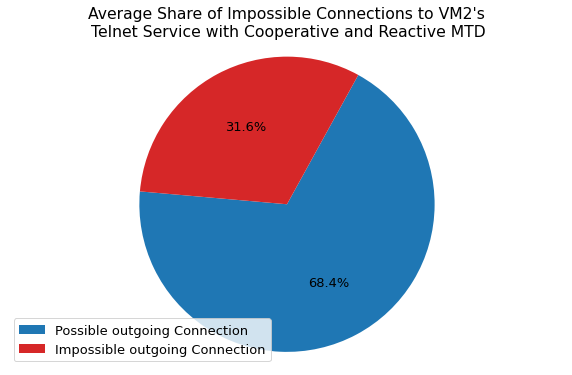

True     2051
False     949
Name: telnetToLocalPossible, dtype: int64


In [3]:
labelsBoth = "Possible outgoing Connection", "Impossible outgoing Connection"
colors = ["#1f77b4", "#d62728"]
width = 0.35
fig1, ax1 = plt.subplots(figsize=(10,6))
fig1.patch.set_facecolor('white')
telnetCountsPossible = telnetToLocalVM2Both['telnetToLocalPossible'].value_counts()

coopAndReactiveShare =  telnetCountsPossible[0]/ (telnetCountsPossible[0] + telnetCountsPossible[1])
print(coopAndReactiveShare)
ax1.pie(telnetCountsPossible, labels=labelsBoth, autopct='%1.1f%%', startangle=175,colors = colors,textprops=dict(color="black"),labeldistance=None)
ax1.legend(labelsBoth,title='')
ax1.axis('equal')
ax1.set_title("Average Share of Impossible Connections to VM2's\n Telnet Service with Cooperative and Reactive MTD")

filename = "telnetToLocalCoopAndReactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)


plt.show()

print(telnetCountsPossible)






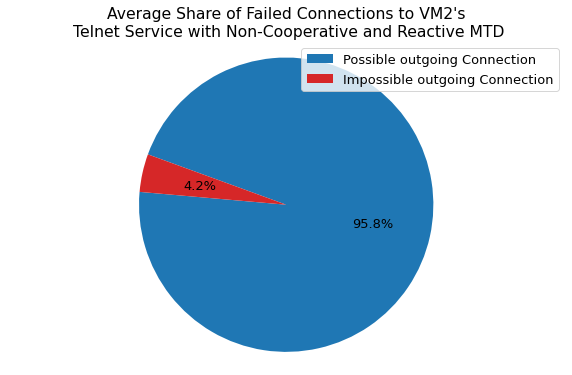

0.041666666666666664
True     2875
False     125
Name: telnetToLocalPossible, dtype: int64


In [4]:




labelsBoth = "Possible outgoing Connection", "Impossible outgoing Connection"
colors = ["#1f77b4", "#d62728"]
width = 0.35
fig1, ax1 = plt.subplots(figsize=(10,6))
fig1.patch.set_facecolor('white')
telnetCountsPossible = telnetToLocalVM2OnlyIP['telnetToLocalPossible'].value_counts()
noncoopAndReactiveShare =  telnetCountsPossible[0]/ (telnetCountsPossible[0] + telnetCountsPossible[1])
ax1.pie(telnetCountsPossible, labels=labelsBoth, autopct='%1.1f%%', startangle=175,colors = colors,textprops=dict(color="black"),labeldistance=None)
ax1.legend(labelsBoth,title='')
ax1.axis('equal')
ax1.set_title("Average Share of Failed Connections to VM2's\n Telnet Service with Non-Cooperative and Reactive MTD")

filename = "telnetToLocalNoncoopAndReactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)


plt.show()


print(noncoopAndReactiveShare)
print(telnetCountsPossible)


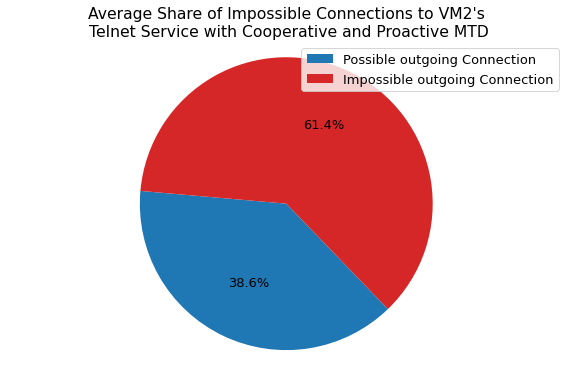

True     1158
False    1842
Name: telnetToLocalPossible, dtype: int64
0.614


In [5]:

labelsBoth = "Possible outgoing Connection", "Impossible outgoing Connection"
colors = ["#1f77b4", "#d62728"]
width = 0.35
fig1, ax1 = plt.subplots(figsize=(10,6))
fig1.patch.set_facecolor('white')
telnetCountsPossible = telnetToLocalVM2BothActive['telnetToLocalPossible'].value_counts()
coopAndPractiveShare =  telnetCountsPossible[0]/ (telnetCountsPossible[0] + telnetCountsPossible[1])
if telnetCountsPossible[0] > telnetCountsPossible[1]:
    telnetCountsPossible = telnetToLocalVM2BothActive['telnetToLocalPossible'].value_counts(ascending=True)
ax1.pie(telnetCountsPossible, labels=labelsBoth, autopct='%1.1f%%', startangle=175,colors = colors,textprops=dict(color="black"),labeldistance=None)
ax1.legend(labelsBoth,title='')
ax1.axis('equal')
ax1.set_title("Average Share of Impossible Connections to VM2's\n Telnet Service with Cooperative and Proactive MTD")

filename = "telnetToLocalCoopAndProactive.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()

print(telnetCountsPossible)
print(coopAndPractiveShare)







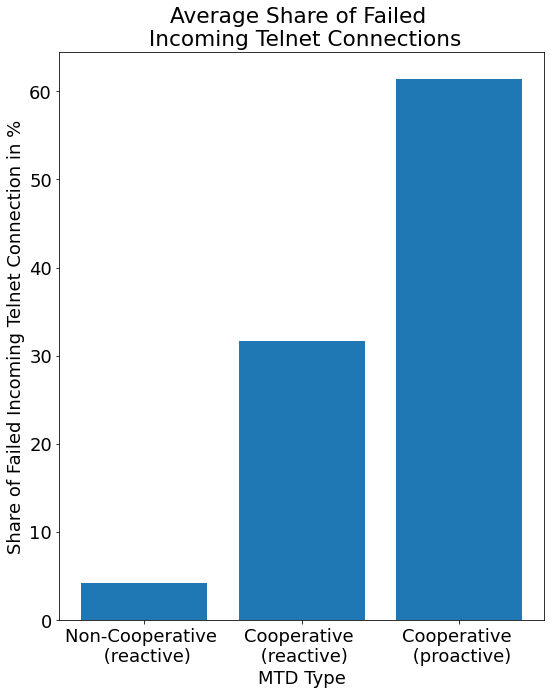

In [6]:
width = 0.35   

font = {'size': 18}
plt.rc('font', **font)



fig, ax = plt.subplots(figsize=(8,10))

ax.bar(['Non-Cooperative \n (reactive)', 'Cooperative \n (reactive)','Cooperative \n (proactive)'], [noncoopAndReactiveShare*100, coopAndReactiveShare*100,coopAndPractiveShare*100])
plt.title('Average Share of Failed \n Incoming Telnet Connections')
plt.xlabel('MTD Type')
plt.ylabel('Share of Failed Incoming Telnet Connection in %')

plt.tight_layout()
filename = "telnetToLocalSummary.png"
plt.savefig(os.path.join(path,filename),dpi= 800)

plt.show()